In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/IVY /Python Capstone Project/Predicting Credit Card Approvals/datasets/cc_approvals.data.csv', na_values='?')

In [3]:
df.head(10)

,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1,+
0,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,43.0,560,+
1,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,280.0,824,+
2,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,100.0,3,+
3,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,120.0,0,+
4,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,360.0,0,+
5,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,164.0,31285,+
6,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,80.0,1349,+
7,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,180.0,314,+
8,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,52.0,1442,+
9,b,22.08,0.830,u,g,c,h,2.165,f,f,0,t,g,128.0,0,+


Assining Names to featues

In [4]:
df.columns = ['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'Citizen', 'ZipCode', 'Income','ApprovalStatus']
df.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,360.0,0,+


##1) Describing Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          677 non-null    object 
 1   Age             677 non-null    float64
 2   Debt            689 non-null    float64
 3   Married         683 non-null    object 
 4   BankCustomer    683 non-null    object 
 5   EducationLevel  680 non-null    object 
 6   Ethnicity       680 non-null    object 
 7   YearsEmployed   689 non-null    float64
 8   PriorDefault    689 non-null    object 
 9   Employed        689 non-null    object 
 10  CreditScore     689 non-null    int64  
 11  DriversLicense  689 non-null    object 
 12  Citizen         689 non-null    object 
 13  ZipCode         676 non-null    float64
 14  Income          689 non-null    int64  
 15  ApprovalStatus  689 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.2+ KB


we have  missing values in data set, and float64(2), int64(2), object(12)
Zip code is Object variable this mean there some charactrical variabel in this feature. we need to check this feature while cleaning data

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,677.0,31.569261,11.966670,13.75,22.580,28.42,38.250,80.25
Debt,689.0,4.765631,4.978470,0.00,1.000,2.75,7.250,28.00
YearsEmployed,689.0,2.224819,3.348739,0.00,0.165,1.00,2.625,28.50
CreditScore,689.0,2.402032,4.866180,0.00,0.000,0.00,3.000,67.00
ZipCode,676.0,183.988166,173.934087,0.00,74.500,160.00,277.000,2000.00
Income,689.0,1018.862119,5213.743149,0.00,0.000,5.00,396.000,100000.00


In [7]:
  df.shape

(689, 16)

In [8]:
df.ApprovalStatus.value_counts(normalize=True)

-    0.555878
+    0.444122
Name: ApprovalStatus, dtype: float64

## 2) Data Pre-Processing

Treat missing values

In [9]:
round(df.isna().mean()*100,2)

Gender            1.74
Age               1.74
Debt              0.00
Married           0.87
BankCustomer      0.87
EducationLevel    1.31
Ethnicity         1.31
YearsEmployed     0.00
PriorDefault      0.00
Employed          0.00
CreditScore       0.00
DriversLicense    0.00
Citizen           0.00
ZipCode           1.89
Income            0.00
ApprovalStatus    0.00
dtype: float64

Treting Categorical Variable

In [10]:
for column in df.columns:
  if df[column].dtype == 'object':
    
    print(column.upper(), ":")
    print(df[column].value_counts(dropna = False))
    print('\n')

GENDER :
b      467
a      210
NaN     12
Name: Gender, dtype: int64


MARRIED :
u      518
y      163
NaN      6
l        2
Name: Married, dtype: int64


BANKCUSTOMER :
g      518
p      163
NaN      6
gg       2
Name: BankCustomer, dtype: int64


EDUCATIONLEVEL :
c      137
q       78
w       63
i       59
aa      54
ff      53
k       51
cc      41
m       38
x       38
d       30
e       25
j       10
NaN      9
r        3
Name: EducationLevel, dtype: int64


ETHNICITY :
v      398
h      138
bb      59
ff      57
NaN      9
z        8
j        8
dd       6
n        4
o        2
Name: Ethnicity, dtype: int64


PRIORDEFAULT :
t    360
f    329
Name: PriorDefault, dtype: int64


EMPLOYED :
f    395
t    294
Name: Employed, dtype: int64


DRIVERSLICENSE :
f    373
t    316
Name: DriversLicense, dtype: int64


CITIZEN :
g    624
s     57
p      8
Name: Citizen, dtype: int64


APPROVALSTATUS :
-    383
+    306
Name: ApprovalStatus, dtype: int64




In [11]:
df.Gender.value_counts(dropna=False)

b      467
a      210
NaN     12
Name: Gender, dtype: int64

In [12]:
# Impute NaN to highest frequency which is "b"

df['Gender'] = df.Gender.replace({np.nan:"b"})

In [13]:
df.Gender.value_counts(dropna=False)

b    479
a    210
Name: Gender, dtype: int64

In [14]:
#Gender annotation
# assume high frequency is male and least is female

df.Gender.replace({"b":"Male","a":"Female"}, inplace=True)

In [15]:
df.Gender.value_counts(dropna=False)

Male      479
Female    210
Name: Gender, dtype: int64

In [16]:
# Married

df.Married.replace({np.nan:"u"}, inplace=True)

In [17]:
df.Married.value_counts(dropna=False)

u    524
y    163
l      2
Name: Married, dtype: int64

In [18]:
# in Married we have l as well we also impute this in u

df.Married.replace({"l":"u"}, inplace=True)

In [19]:
# assume u indiacate as married and y as unmarried. there is chance a person can be divorcee but as frequncy is very less as replace with married

df.Married.replace({"u":"Married","y":"Batchlor"}, inplace=True)

In [20]:
df.Married.value_counts(dropna=False)

Married     526
Batchlor    163
Name: Married, dtype: int64

In [21]:
# EducationLevel
# we will encode this feature before preparing data for ML we keep education level as it is for this point.
df.EducationLevel.replace({np.nan:"c"}, inplace= True)

In [22]:
df.EducationLevel.value_counts(dropna=False)

c     146
q      78
w      63
i      59
aa     54
ff     53
k      51
cc     41
m      38
x      38
d      30
e      25
j      10
r       3
Name: EducationLevel, dtype: int64

In [23]:
# BankCustomer

df.BankCustomer.value_counts(dropna=False)

g      518
p      163
NaN      6
gg       2
Name: BankCustomer, dtype: int64

In [24]:
df.BankCustomer.replace({np.nan:"g", "gg":"g"}, inplace=True)

In [25]:
# either the customer is bank customer or not we replace g and p with yes and no

df.BankCustomer.replace({"g":"Yes","p":"No"}, inplace=True)

In [26]:
df.BankCustomer.value_counts(dropna=False)

Yes    526
No     163
Name: BankCustomer, dtype: int64

In [27]:
## Ethnicity
# we encode this at time of preparing data for ML. at this point we wont change this.

df.Ethnicity.value_counts(dropna=False)

v      398
h      138
bb      59
ff      57
NaN      9
z        8
j        8
dd       6
n        4
o        2
Name: Ethnicity, dtype: int64

In [28]:
df.Ethnicity.replace({np.nan:"v"}, inplace=True)

In [29]:
df.Ethnicity.value_counts(dropna=False)

v     407
h     138
bb     59
ff     57
z       8
j       8
dd      6
n       4
o       2
Name: Ethnicity, dtype: int64

In [30]:
# Citizen 

df.Citizen.value_counts(dropna=False)

g    624
s     57
p      8
Name: Citizen, dtype: int64

In [31]:
# either the applicant is either citizen or not we have one additional character here we assume this is citizen of country.

df.Citizen.replace({"p":"g"}, inplace=True)

In [32]:
# we replace g and s as Citizen or not 

df.Citizen.replace({"g":"Yes","s":"No"}, inplace=True)

In [33]:
df.Citizen.value_counts(dropna=False)

Yes    632
No      57
Name: Citizen, dtype: int64

In [34]:
# PriorDefault

df.PriorDefault.value_counts(dropna=False)

t    360
f    329
Name: PriorDefault, dtype: int64

In [35]:
# giving proper annotation 
# assume t as yes and f as No
df.PriorDefault.replace({"t":"Yes","f":"No"},inplace=True)

In [36]:
df.PriorDefault.value_counts(dropna=False)

Yes    360
No     329
Name: PriorDefault, dtype: int64

In [37]:
# DriversLicense
df.DriversLicense.value_counts(dropna=False)

f    373
t    316
Name: DriversLicense, dtype: int64

In [38]:
# replace f as No and t as Yes

df.DriversLicense.replace({"f":"No","t":"Yes"}, inplace=True)

In [39]:
df.DriversLicense.value_counts(dropna=False)

No     373
Yes    316
Name: DriversLicense, dtype: int64

In [40]:
#ApprovalStatus

df.ApprovalStatus.value_counts()

-    383
+    306
Name: ApprovalStatus, dtype: int64

In [41]:
# replace - to No and + to yes

df.ApprovalStatus.replace({"-":"No","+":"Yes"}, inplace=True)

In [42]:
df.ApprovalStatus.value_counts()

No     383
Yes    306
Name: ApprovalStatus, dtype: int64

In [43]:
df.Employed.value_counts(dropna=False)

f    395
t    294
Name: Employed, dtype: int64

In [44]:
# replace f with No and t with yes

df.Employed.replace({"f":"No","t":"Yes"}, inplace = True)

In [45]:
df.Employed.value_counts(dropna=False)

No     395
Yes    294
Name: Employed, dtype: int64

In [46]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,Female,58.67,4.460,Married,Yes,q,h,3.04,Yes,Yes,6,No,Yes,43.0,560,Yes
1,Female,24.50,0.500,Married,Yes,q,h,1.50,Yes,No,0,No,Yes,280.0,824,Yes
2,Male,27.83,1.540,Married,Yes,w,v,3.75,Yes,Yes,5,Yes,Yes,100.0,3,Yes
3,Male,20.17,5.625,Married,Yes,w,v,1.71,Yes,No,0,No,No,120.0,0,Yes
4,Male,32.08,4.000,Married,Yes,m,v,2.50,Yes,No,0,Yes,Yes,360.0,0,Yes


In [47]:
df.isna().mean()*100

Gender            0.000000
Age               1.741655
Debt              0.000000
Married           0.000000
BankCustomer      0.000000
EducationLevel    0.000000
Ethnicity         0.000000
YearsEmployed     0.000000
PriorDefault      0.000000
Employed          0.000000
CreditScore       0.000000
DriversLicense    0.000000
Citizen           0.000000
ZipCode           1.886792
Income            0.000000
ApprovalStatus    0.000000
dtype: float64

In [48]:
# we have age missign values we impute with Median

df.Age.replace(np.nan, df.Age.median(), inplace=True)

In [49]:
df.Age.isna().mean()*100

0.0

In [50]:
# as Zip code as its no use of analysis so we can drop this feature

df.drop("ZipCode", axis=1, inplace=True)
df.drop("DriversLicense", axis=1, inplace=True)

In [51]:
df.isna().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
Citizen           0
Income            0
ApprovalStatus    0
dtype: int64

In [52]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income,ApprovalStatus
0,Female,58.67,4.460,Married,Yes,q,h,3.04,Yes,Yes,6,Yes,560,Yes
1,Female,24.50,0.500,Married,Yes,q,h,1.50,Yes,No,0,Yes,824,Yes
2,Male,27.83,1.540,Married,Yes,w,v,3.75,Yes,Yes,5,Yes,3,Yes
3,Male,20.17,5.625,Married,Yes,w,v,1.71,Yes,No,0,No,0,Yes
4,Male,32.08,4.000,Married,Yes,m,v,2.50,Yes,No,0,Yes,0,Yes


##3) Data Visualization: Univariate Analysis

In [53]:
df.columns

Index(['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel',
       'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'Citizen', 'Income', 'ApprovalStatus'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed i

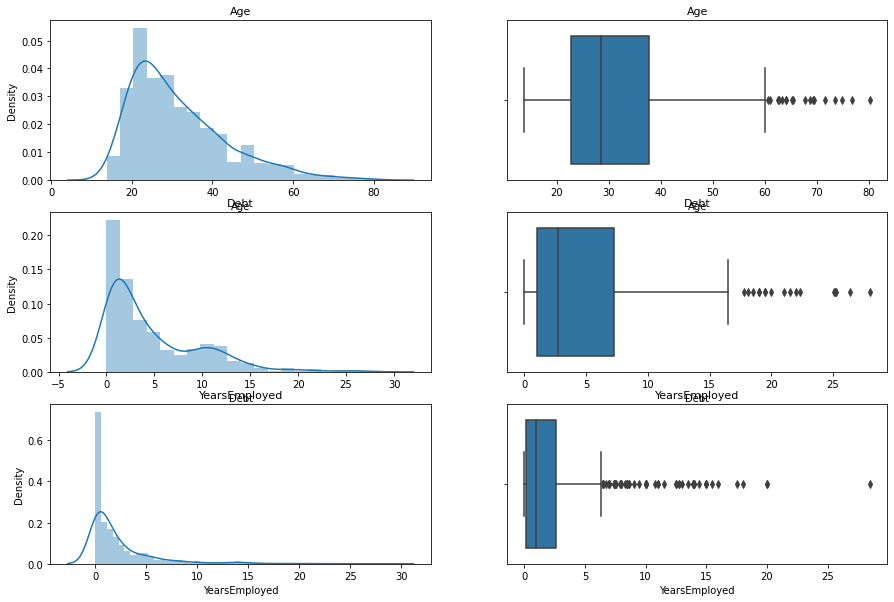

In [54]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(15,10)
a = sns.distplot(df['Age'], ax = axes[0][0])
a.set_title('Age', fontsize = 11)

a = sns.boxplot(df['Age'],orient ="v", ax = axes[0][1])
a.set_title("Age",fontsize=11)

a = sns.distplot(df['Debt'], ax = axes[1][0]);

a.set_title('Debt', fontsize = 11);

a = sns.boxplot(df['Debt'],orient ="v", ax = axes[1][1]);
a.set_title('Debt', fontsize = 11);

a = sns.distplot(df['YearsEmployed'], ax = axes[2][0]);
a.set_title('YearsEmployed', fontsize = 11);

a = sns.boxplot(df['YearsEmployed'],orient ="v", ax = axes[2][1]);
a.set_title('YearsEmployed', fontsize = 11);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed i

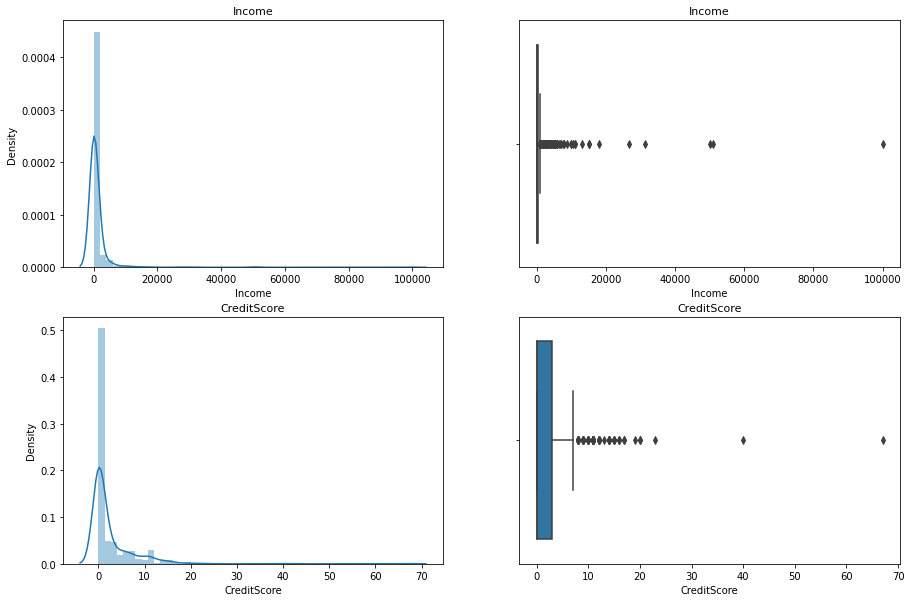

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(15,10)
a = sns.distplot(df['Income'], ax = axes[0][0])
a.set_title('Income', fontsize = 11)

a = sns.boxplot(df['Income'],orient ="v", ax = axes[0][1])
a.set_title("Income",fontsize=11)

a = sns.distplot(df['CreditScore'], ax = axes[1][0]);

a.set_title('CreditScore', fontsize = 11);

a = sns.boxplot(df['CreditScore'],orient ="v", ax = axes[1][1]);
a.set_title('CreditScore', fontsize = 11);



Analyzing Categorical Variable Frquencies levels using seaborn countplots which gives the counts of observations in each category 


In [55]:
for column in df.columns:
  df[column].dtype == 'object'
  print(column)

Gender
Age
Debt
Married
BankCustomer
EducationLevel
Ethnicity
YearsEmployed
PriorDefault
Employed
CreditScore
Citizen
Income
ApprovalStatus


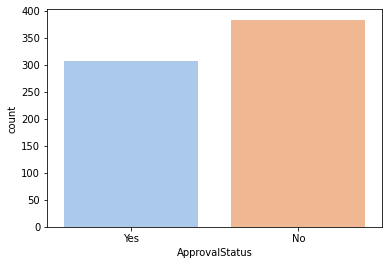

In [56]:
sns.countplot(x = "ApprovalStatus", data = df, palette='pastel');

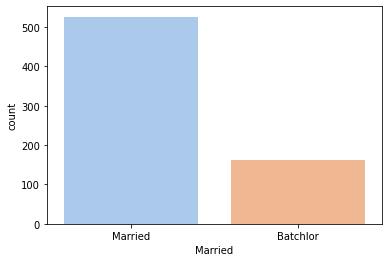

In [57]:
sns.countplot(x = "Married", data = df, palette='pastel');

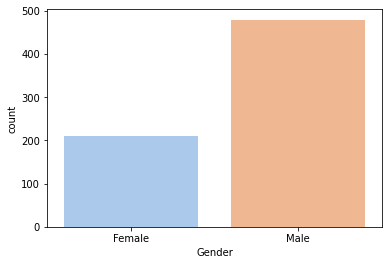

In [58]:
sns.countplot(x = "Gender", data = df, palette='pastel');

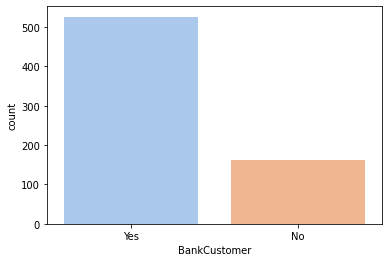

In [59]:

sns.countplot(x = "BankCustomer", data = df, palette='pastel');

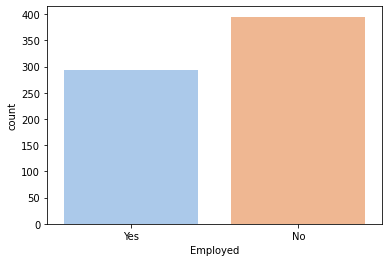

In [60]:
sns.countplot(x = "Employed", data = df, palette='pastel');

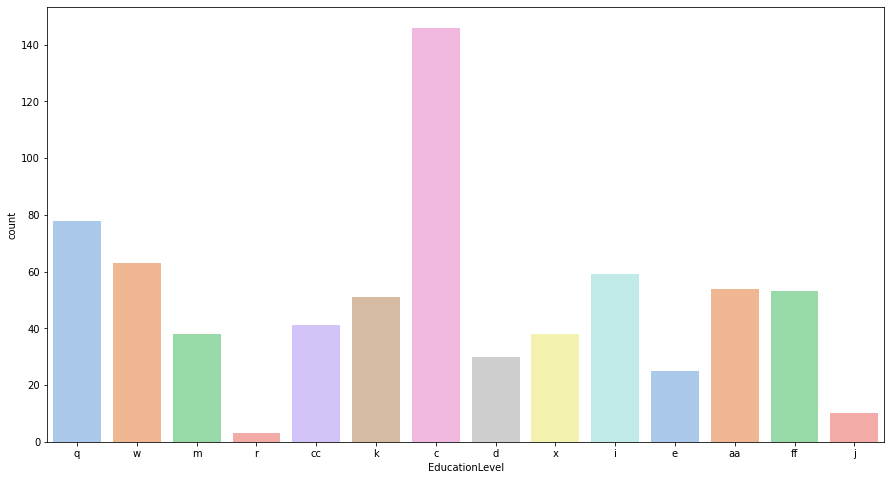

In [61]:
plt.figure(figsize=(15,8))
sns.countplot(x = "EducationLevel", data = df, palette='pastel');

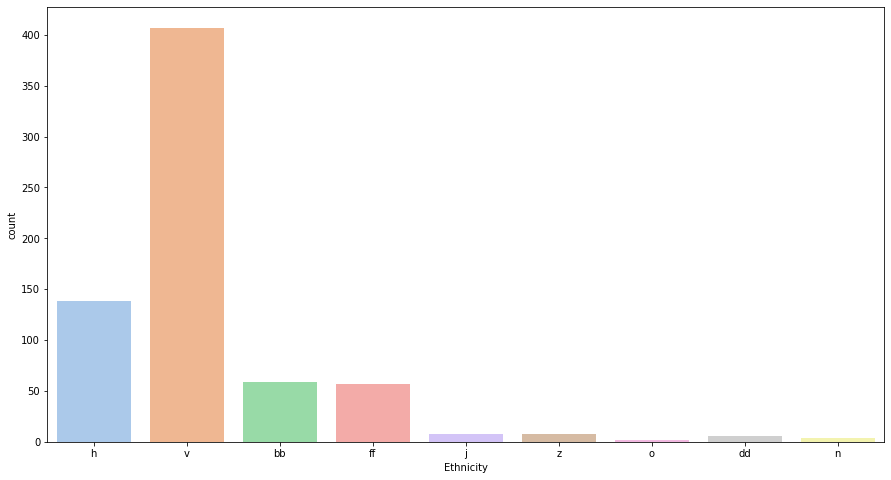

In [62]:
plt.figure(figsize=(15,8))
sns.countplot(x = "Ethnicity", data = df, palette='pastel');

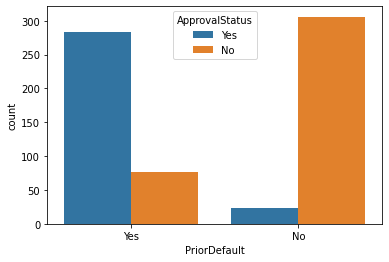

In [63]:
sns.countplot(x = 'PriorDefault', hue = 'ApprovalStatus', data = df);

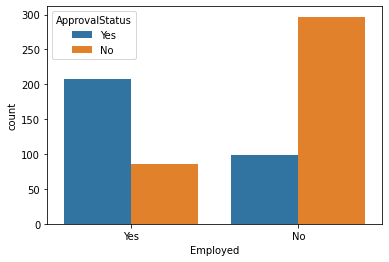

In [64]:
sns.countplot(x = 'Employed', hue = 'ApprovalStatus', data = df);

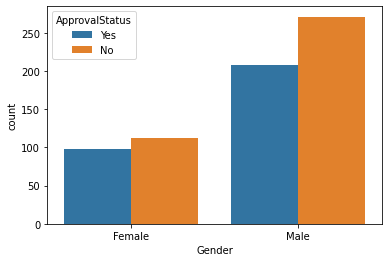

In [ ]:
sns.countplot(x = 'Gender', hue = 'ApprovalStatus', data = df);


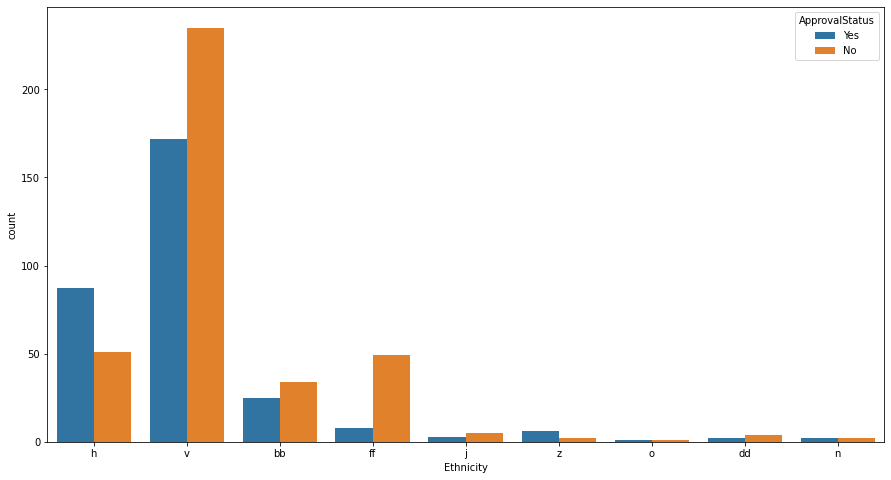

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x = 'Ethnicity', hue = 'ApprovalStatus', data = df);

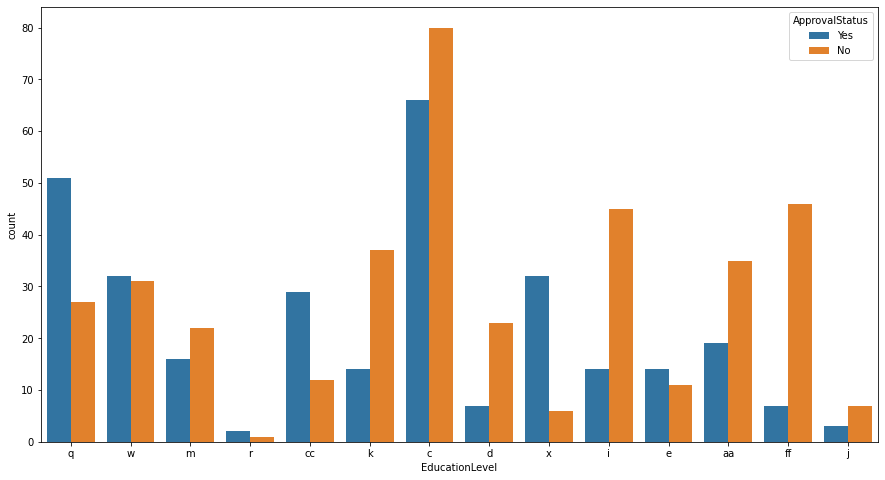

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x = 'EducationLevel', hue = 'ApprovalStatus', data = df);

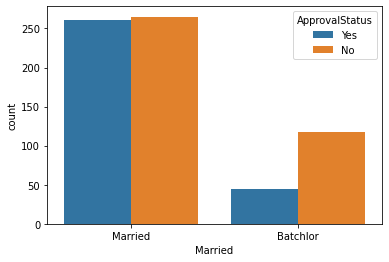

In [ ]:
sns.countplot(x = 'Married', hue = 'ApprovalStatus', data = df);

Multivariate Analysis

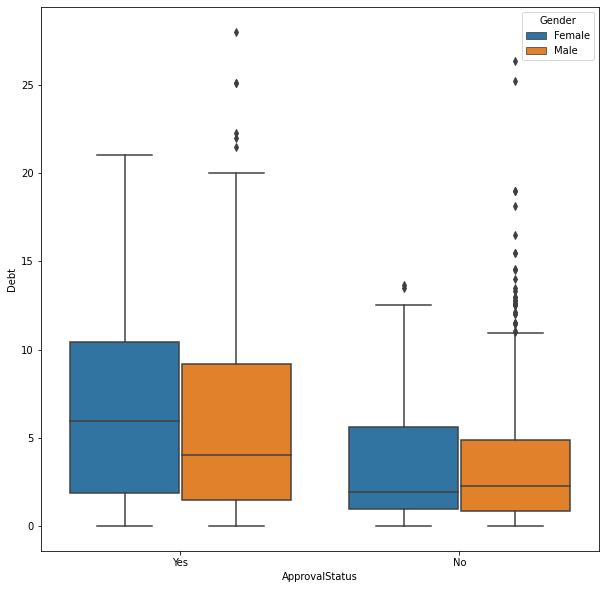

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x='ApprovalStatus',y='Debt',data=df,hue='Gender')

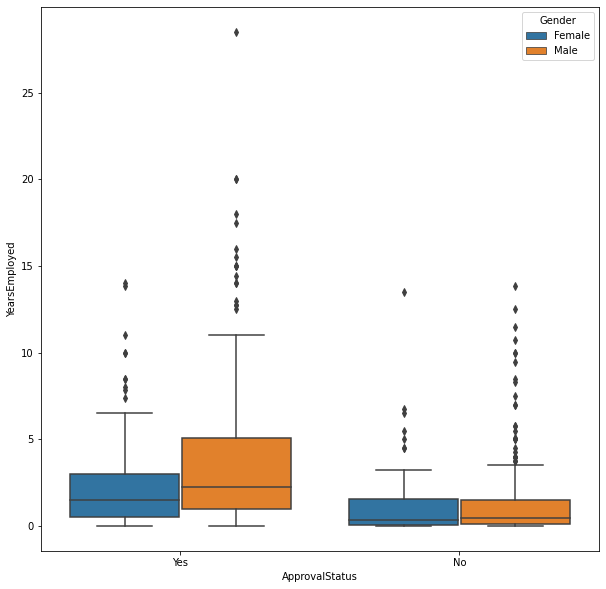

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x='ApprovalStatus',y='YearsEmployed',data=df,hue='Gender')

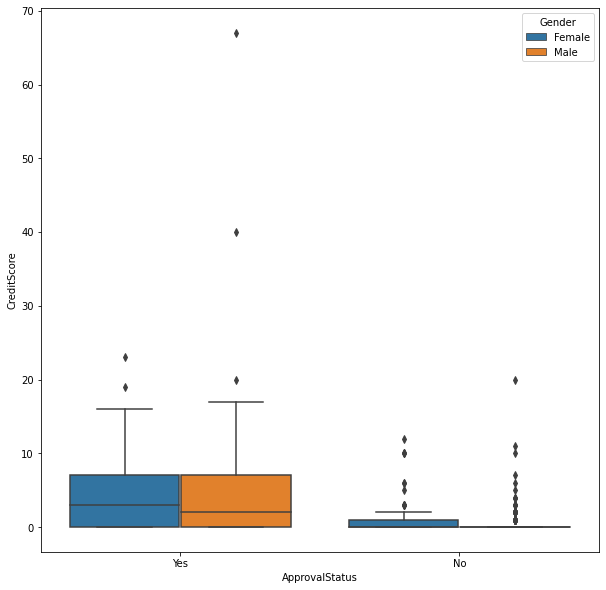

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x='ApprovalStatus',y='CreditScore',data=df,hue='Gender')

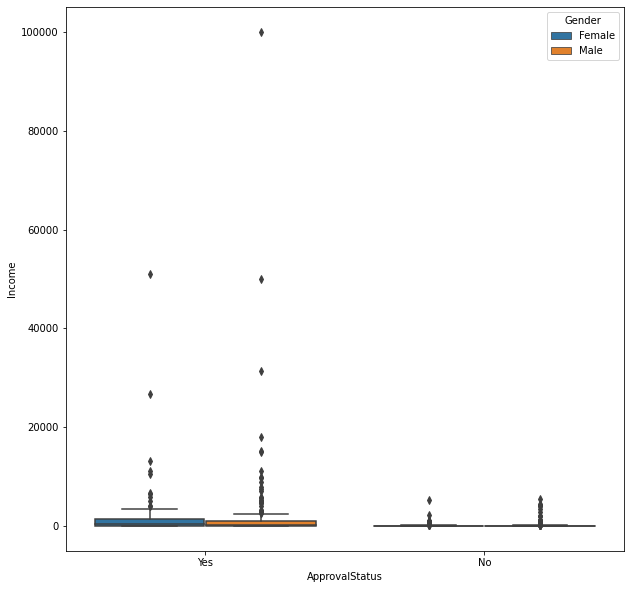

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x='ApprovalStatus',y='Income',data=df,hue='Gender')

Correlation Heatmap

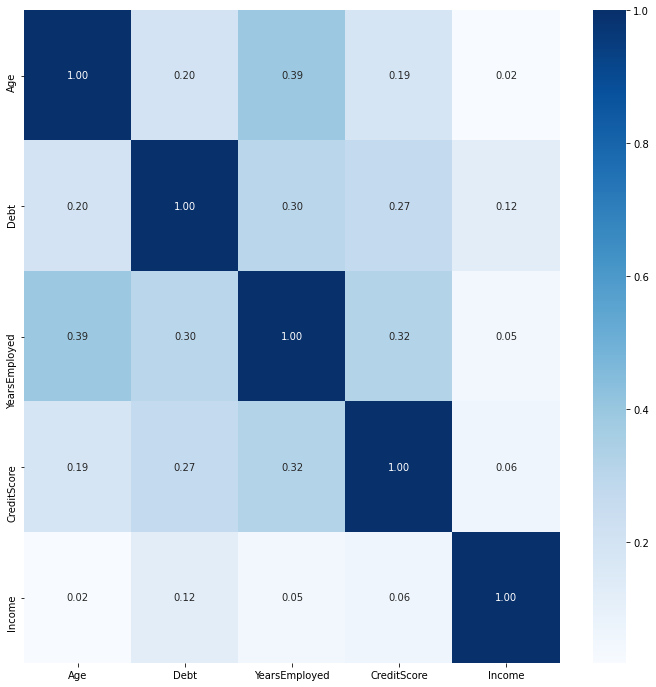

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Blues');

##4) Data Preparation

In [ ]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income,ApprovalStatus
0,Female,58.67,4.460,Married,Yes,q,h,3.04,Yes,Yes,6,Yes,560,Yes
1,Female,24.50,0.500,Married,Yes,q,h,1.50,Yes,No,0,Yes,824,Yes
2,Male,27.83,1.540,Married,Yes,w,v,3.75,Yes,Yes,5,Yes,3,Yes
3,Male,20.17,5.625,Married,Yes,w,v,1.71,Yes,No,0,No,0,Yes
4,Male,32.08,4.000,Married,Yes,m,v,2.50,Yes,No,0,Yes,0,Yes


In [ ]:
cat = []
num = []

for i in df.columns:
  if df[i].dtype == 'object':
    cat.append(i)
  else:
    num.append(i)
print("Cat :")
print(cat)
print('\n')
print("Number :")
print(num)

Cat :
['Gender', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'PriorDefault', 'Employed', 'Citizen', 'ApprovalStatus']


Number :
['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income']


Data Encoding 

In [ ]:
df.Gender.value_counts()

Male      479
Female    210
Name: Gender, dtype: int64

In [ ]:
df.Gender.replace({"Male":1,"Female":0}, inplace = True)

In [ ]:
df.Gender.value_counts()

1    479
0    210
Name: Gender, dtype: int64

In [ ]:
df.Married.value_counts()

Married     526
Batchlor    163
Name: Married, dtype: int64

In [ ]:
df.Married.replace({"Married":1, "Batchlor":0}, inplace=True)

In [ ]:
df.Married.value_counts()

1    526
0    163
Name: Married, dtype: int64

In [ ]:
df.BankCustomer.value_counts()

Yes    526
No     163
Name: BankCustomer, dtype: int64

In [ ]:
df.BankCustomer.replace({"Yes":1,"No":0}, inplace = True)

In [ ]:
df.BankCustomer.value_counts()

1    526
0    163
Name: BankCustomer, dtype: int64

In [ ]:
df.EducationLevel.value_counts()

c     146
q      78
w      63
i      59
aa     54
ff     53
k      51
cc     41
x      38
m      38
d      30
e      25
j      10
r       3
Name: EducationLevel, dtype: int64

In [ ]:
df.EducationLevel.replace({"r":0,
                           "j":1,
                           "e":2,
                           "d":3,
                           "x":4,
                           "m":5,
                           "cc":6,
                           "k":7,
                           "ff":8,
                           "aa":9,
                           "i":10,
                           "w":11,
                           "q":12,
                           "c":13}, inplace = True)

In [ ]:
df.EducationLevel.value_counts()

13    146
12     78
11     63
10     59
9      54
8      53
7      51
6      41
5      38
4      38
3      30
2      25
1      10
0       3
Name: EducationLevel, dtype: int64

In [ ]:
df.Ethnicity.value_counts()

v     407
h     138
bb     59
ff     57
z       8
j       8
dd      6
n       4
o       2
Name: Ethnicity, dtype: int64

In [ ]:
df.Ethnicity.replace({"o":0,
                      "n":1,
                      'dd':2,
                      'j':3,
                      'z':4,
                      'ff':5,
                      'bb':6,
                      'h':7,
                      'v':8}, inplace = True)

In [ ]:
df.Ethnicity.value_counts()

8    407
7    138
6     59
5     57
4      8
3      8
2      6
1      4
0      2
Name: Ethnicity, dtype: int64

In [ ]:
df.PriorDefault.value_counts()

Yes    360
No     329
Name: PriorDefault, dtype: int64

In [ ]:
df.PriorDefault.replace({"Yes":1,"No":0}, inplace=True)

In [ ]:
df.PriorDefault.value_counts()

1    360
0    329
Name: PriorDefault, dtype: int64

In [ ]:
df.Employed.value_counts()

No     395
Yes    294
Name: Employed, dtype: int64

In [ ]:
df.Employed.replace({'Yes':1,'No':0}, inplace = True)

In [ ]:
df.Employed.value_counts()

0    395
1    294
Name: Employed, dtype: int64

In [ ]:
df.Citizen.value_counts()

Yes    632
No      57
Name: Citizen, dtype: int64

In [ ]:
df.Citizen.replace({'Yes':1,'No':0}, inplace = True)

In [ ]:
df.Citizen.value_counts()

1    632
0     57
Name: Citizen, dtype: int64

In [ ]:
df.ApprovalStatus.value_counts()

No     383
Yes    306
Name: ApprovalStatus, dtype: int64

In [ ]:
df.ApprovalStatus.replace({'No':0,'Yes':1}, inplace = True)

In [ ]:
df.ApprovalStatus.value_counts()

0    383
1    306
Name: ApprovalStatus, dtype: int64

In [ ]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income,ApprovalStatus
0,0,58.67,4.460,1,1,12,7,3.04,1,1,6,1,560,1
1,0,24.50,0.500,1,1,12,7,1.50,1,0,0,1,824,1
2,1,27.83,1.540,1,1,11,8,3.75,1,1,5,1,3,1
3,1,20.17,5.625,1,1,11,8,1.71,1,0,0,0,0,1
4,1,32.08,4.000,1,1,5,8,2.50,1,0,0,1,0,1


In [ ]:
round(pd.crosstab(df.Gender, df.ApprovalStatus, margins=True, margins_name="Total", normalize=True)*100,2)

ApprovalStatus,0,1,Total
Gender,,,
0,16.26,14.22,30.48
1,39.33,30.19,69.52
Total,55.59,44.41,100.00


Outlier Check

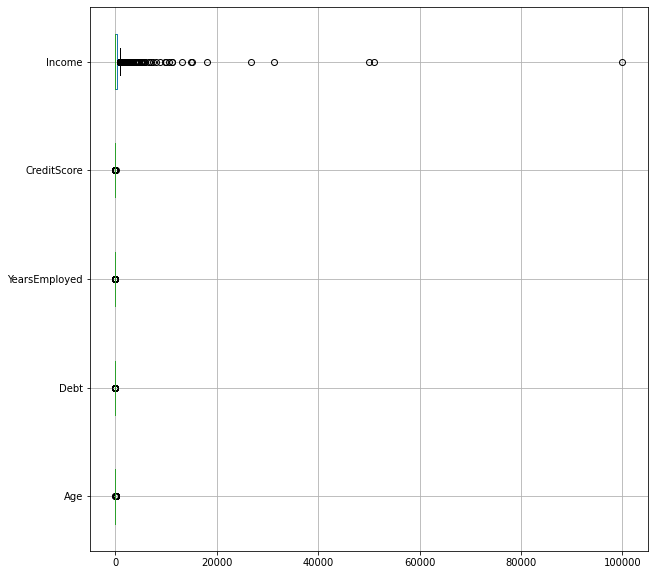

In [ ]:
plt.figure(figsize=(10,10))
df[num].boxplot(vert=0)
plt.show()

Outlier Treatment

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [ ]:
for column in df.columns:
    lr,ur=remove_outlier(df['Income'])
    df['Income']=np.where(df['Income']>ur,ur,df['Income'])
    df['Income']=np.where(df['Income']<lr,lr,df['Income'])

    lr,ur=remove_outlier(df['CreditScore'])
    df['CreditScore']=np.where(df['CreditScore']>ur,ur,df['CreditScore'])
    df['CreditScore']=np.where(df['CreditScore']<lr,lr,df['CreditScore'])

    lr,ur=remove_outlier(df['YearsEmployed'])
    df['YearsEmployed']=np.where(df['YearsEmployed']>ur,ur,df['YearsEmployed'])
    df['YearsEmployed']=np.where(df['YearsEmployed']<lr,lr,df['YearsEmployed'])

    lr,ur=remove_outlier(df['Debt'])
    df['Debt']=np.where(df['Debt']>ur,ur,df['Debt'])
    df['Debt']=np.where(df['Debt']<lr,lr,df['Debt'])

    lr,ur=remove_outlier(df['Age'])
    df['Age']=np.where(df['Age']>ur,ur,df['Age'])
    df['Age']=np.where(df['Age']<lr,lr,df['Age'])

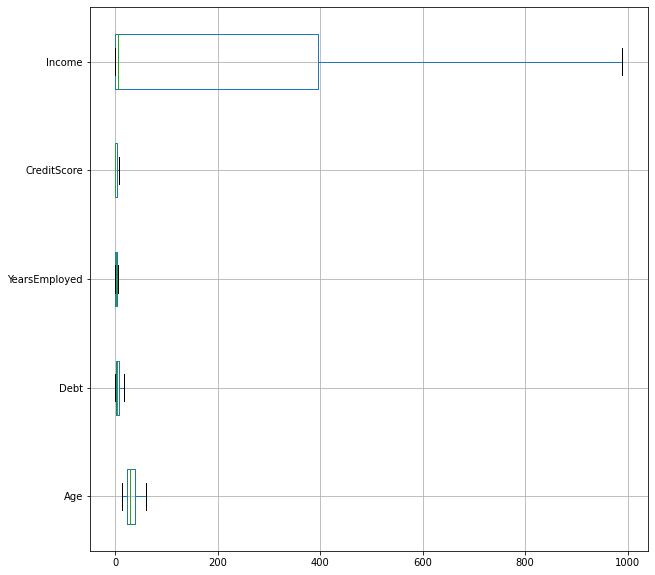

In [ ]:
plt.figure(figsize=(10,10))
df[num].boxplot(vert=0)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          689 non-null    int64  
 1   Age             689 non-null    float64
 2   Debt            689 non-null    float64
 3   Married         689 non-null    int64  
 4   BankCustomer    689 non-null    int64  
 5   EducationLevel  689 non-null    int64  
 6   Ethnicity       689 non-null    int64  
 7   YearsEmployed   689 non-null    float64
 8   PriorDefault    689 non-null    int64  
 9   Employed        689 non-null    int64  
 10  CreditScore     689 non-null    float64
 11  Citizen         689 non-null    int64  
 12  Income          689 non-null    float64
 13  ApprovalStatus  689 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 75.5 KB


In [ ]:
#df = pd.get_dummies(df, columns=['Gender','Married','BankCustomer','PriorDefault','Employed','Citizen'], drop_first=True)

In [ ]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income,ApprovalStatus
0,0,58.67,4.460,1,1,12,7,3.04,1,1,6.0,1,560.0,1
1,0,24.50,0.500,1,1,12,7,1.50,1,0,0.0,1,824.0,1
2,1,27.83,1.540,1,1,11,8,3.75,1,1,5.0,1,3.0,1
3,1,20.17,5.625,1,1,11,8,1.71,1,0,0.0,0,0.0,1
4,1,32.08,4.000,1,1,5,8,2.50,1,0,0.0,1,0.0,1


Save File

In [ ]:
#df.to_csv('/content/drive/MyDrive/IVY /Python Capstone Project/Predicting Credit Card Approvals/datasets/clean_Data.csv', index=False)  